In [2]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [4]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<17)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_8148\386116709.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## Proportion different filters discard

In [6]:
# This is using FeT in both Liq and Cpx
eq_tests_FeT=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                        Fe3Fet_Liq=0, T=Cpx_Glass['T_K_x'],
                                            P=Cpx_Glass['P_kbar_x'])

eq_tests_FeT_Filt2=eq_tests_FeT.loc[(Press_new)]
Cpx_Glass_Filt2=Cpx_Glass.loc[Press_new]


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## En Fs, DiHd - Mollo13

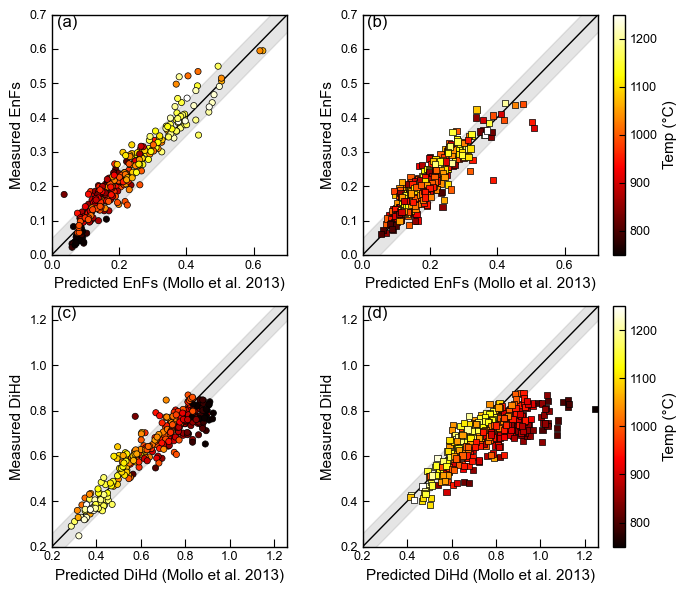

In [7]:
# Mollo13 give 1 sigma as 0.06
a=1
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize = (7,6))
ssize=20


s=ax1.scatter(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[OldMask], 
          eq_tests_FeT['EnFs'].loc[OldMask], marker='o', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15, cmap='hot',
 zorder=100)

s=ax2.scatter(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[Press_new], 
          eq_tests_FeT['EnFs'].loc[Press_new], marker='s', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, cmap='hot',
 zorder=100)
fig.colorbar(s, ax=ax1, label='PEC-corrected MgO (wt%)')
fig.delaxes(fig.axes[4])
fig.colorbar(s, ax=ax2, label='Temp (°C)')


ax1.set_xlabel('Predicted EnFs (Mollo et al. 2013)')
ax1.set_ylabel('Measured EnFs')
ax2.set_xlabel('Predicted EnFs (Mollo et al. 2013)')
ax2.set_ylabel('Measured EnFs')
minx=0.0
maxx=0.7

ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax1.fill_between([minx, maxx],[minx+0.05, maxx+0.05], [minx-0.05, maxx-0.05],
                 color='grey', alpha=0.2)

ax2.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax2.fill_between([minx, maxx],[minx+0.05, maxx+0.05], [minx-0.05, maxx-0.05],
                 color='grey', alpha=0.2)

minx=0.2
maxx=1.26
# ax3.plot(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask], 
#          eq_tests_FeT['DiHd_1996'].loc[OldMask], '.k')
# ax4.plot(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new], 
#          eq_tests_FeT['DiHd_1996'].loc[Press_new], '.b')


s=ax3.scatter(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask], 
          eq_tests_FeT['DiHd_1996'].loc[OldMask], marker='o', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15, cmap='hot',
 zorder=100)

s=ax4.scatter(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new], 
          eq_tests_FeT['DiHd_1996'].loc[Press_new], marker='s', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, cmap='hot',
 zorder=100)

fig.colorbar(s, ax=ax4, label='Temp (°C)')
fig.colorbar(s, ax=ax3, label='PEC-corrected MgO (wt%)')
fig.delaxes(fig.axes[6])

ax3.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax3.fill_between([minx, maxx],[minx+0.06, maxx+0.06], [minx-0.06, maxx-0.06],
                 color='grey', alpha=0.2)
ax4.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax4.fill_between([minx, maxx],[minx+0.06, maxx+0.06], [minx-0.06, maxx-0.06],
                 color='grey', alpha=0.2)

ax1.annotate("(a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax2.annotate("(b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax3.annotate("(c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax4.annotate("(d)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)


ax3.set_ylabel('Measured DiHd')
ax3.set_xlabel('Predicted DiHd (Mollo et al. 2013)')
ax4.set_ylabel('Measured DiHd')
ax4.set_xlabel('Predicted DiHd (Mollo et al. 2013)')
ax1.set_xlim([0,  0.7])
ax2.set_xlim([0,  0.7])
ax1.set_ylim([0,  0.7])
ax2.set_ylim([0,  0.7])

ax3.set_xlim([0.2,  1.26])
ax4.set_xlim([0.2,  1.26])
ax3.set_ylim([0.2,  1.26])
ax4.set_ylim([0.2,  1.26])
#ax1.set_ylim([-0.003, 0.25])
fig.tight_layout()
fig.savefig('Cpx_Liq_EnFs_Mollo13Di.png', dpi=300)

## Splitting into LEPR and not LEPR

In [8]:
len([0, 5, 10, 20, 40, 35, 40, 45, 50, 55, 65,
          76, 81, 91, 100, 250, 260, 280, 299, 300])

20

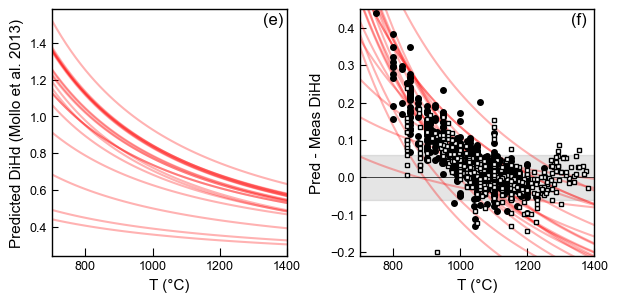

In [9]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(7,3.2))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.21, hspace=None)



  

   
# s=ax1.scatter(eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, 
#           eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new]-eq_tests_FeT['DiHd_1996'].loc[Press_new],
#               marker='o', s=ssize, edgecolors='k', linewidths=0.5,
#             c=eq_tests_FeT['H2O_Liq'].loc[Press_new]-273.15, cmap='hot',
#  zorder=100)

# fig.colorbar(s, ax=ax4, label='Temp (°C)')


T=np.linspace(700+273.15, 1400+273.15)

for i in [0, 5, 10, 20, 40, 35, 40, 45, 50, 55, 65,
          76, 81, 91, 100, 250, 260, 280, 299, 300]:

    DiHd_Pred_diff_1=(np.exp(-2.18 - 3.16 * eq_tests_FeT['Ti_Liq_cat_frac'].iloc[i]
    - 0.365 * np.log(eq_tests_FeT['Al_Liq_cat_frac'].iloc[i].astype(float))
     + 0.05 * np.log(eq_tests_FeT['Mg_Liq_cat_frac'].iloc[i]) - 3858.2 * (
    eq_tests_FeT['EnFs'].iloc[i]**2 / T) + (2107.4 / T)
    - 17.64 *cpx_Glass['P_kbar_x'].iloc[i] / T))-eq_tests_FeT['DiHd_1996'].iloc[i]


    DiHd_Pred_1=(np.exp(-2.18 - 3.16 * eq_tests_FeT['Ti_Liq_cat_frac'].iloc[i]
    - 0.365 * np.log(eq_tests_FeT['Al_Liq_cat_frac'].iloc[i].astype(float))
     + 0.05 * np.log(eq_tests_FeT['Mg_Liq_cat_frac'].iloc[i]) - 3858.2 * (
    eq_tests_FeT['EnFs'].iloc[i]**2 / T) + (2107.4 / T)
    - 17.64 *cpx_Glass['P_kbar_x'].iloc[i] / T))

    ax1.plot(T-273.15, DiHd_Pred_diff_1, '-r', alpha=0.3)

    ax2.plot(T-273.15, DiHd_Pred_1, '-r', alpha=0.3)

    



ax1.fill_between([700-273.15, 1700-273.15],[0.06, 0.06], [-0.06, -0.06],
                 color='grey', alpha=0.2)
ax1.plot([700, 1400], [0, 0], '-k', lw=0.5)



ax1.plot(eq_tests_FeT_Filt2['T_K_calc']-273.15, 
         eq_tests_FeT_Filt2['DiHd_Pred_Mollo13']-eq_tests_FeT_Filt2['DiHd_1996'],
'ok', ms=4)

ax1.plot(eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15,
         eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask]
         -eq_tests_FeT['DiHd_1996'].loc[OldMask], 'sk', mfc='white', ms=2.5)


ax1.set_xlim([700, 1400])
ax2.set_xlim([700, 1400])
ax1.set_ylim([-0.21, 0.45])
ax2.set_ylabel('Predicted DiHd (Mollo et al. 2013)')
ax2.set_xlabel('T (°C)')
ax1.set_xlabel('T (°C)')
ax1.set_ylabel('Pred - Meas DiHd')

ax2.annotate("(e)", xy=(0.9, 0.94), xycoords="axes fraction", fontsize=12)
ax1.annotate("(f)", xy=(0.9, 0.94), xycoords="axes fraction", fontsize=12)

plt.subplots_adjust( wspace=0.31)
fig.savefig('Cpx_Liq_DiHd_Temp.png', dpi=300, transparent=True)